In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# 최대 x 범위 : 0 <= x < x_max
x_max = 3
x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))

# 차수, weight 개수
n = 4

# w1 = [weight1, weight2, weight3, weight4]
# w2 = [weight1, weight2, weight3, weight4]
w1 = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))
w2 = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))

# analysis 함수 
def anal_cos(x, lamb = 1):
    return np.cos(lamb*x)

def anal_sin(x, lamb = 1):
    return np.sin(lamb*x)

def f(anal_cos, anal_sin, lamb = 1):
    return [lamb*anal_cos, lamb*anal_sin]

# n : w 개수, w : weight
def y(x, w, n = 4, b = 1):
    y = b
    
    # y = w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0

    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
      yprime += i*w[i-1]*(x**(i-1))

    return yprime

# lambda 값, 학습률 조정
lamb = 1
learning_rate = 0.001
EPOCH = 100

# 변화 w 값, loss 저장
w1_trace = []
w2_trace = []
w1_trace.append(w1.numpy())
w2_trace.append(w2.numpy())
loss_trace = []

# y1, y2 설정
y1 = y(x, w1, n, 1)    # cos
y2 = y(x, w2, n, 0)    # sin
y1prime = yprime(x, w1, n)
y2prime = yprime(x, w2, n)

# 학습 과정
for epoch in range(EPOCH):
    for x_unit, y_unit in zip(x, anal_cos(x)):
        with tf.GradientTape() as tape:
            # 예측 값
            predict = y(x_unit, w1, n)
            # 오차
            # loss = tf.reduce_mean(tf.square(yprime(x, w) - f(anal(x), lamb)))
            # loss = predict - y_unit
            # d/dx(cos(x)) = -sin(x)
            # loss = y1prime + y2 + y2prime - y1
            loss = tf.reduce_mean(tf.square(yprime(x_unit, w1, n) + y(x_unit, w2, n, 0))) + tf.reduce_mean(tf.square(yprime(x_unit, w2, n) - y(x_unit, w1, n, 1))) 
            loss_trace.append(loss.numpy())
            gradients = tape.gradient(loss, [w1, w2])

            w1 = tf.Variable(w1 - learning_rate*gradients[0], dtype=tf.float32)
            w2 = tf.Variable(w2 - learning_rate*gradients[1], dtype=tf.float32)
            w1_trace.append(w1.numpy())
            w2_trace.append(w2.numpy())

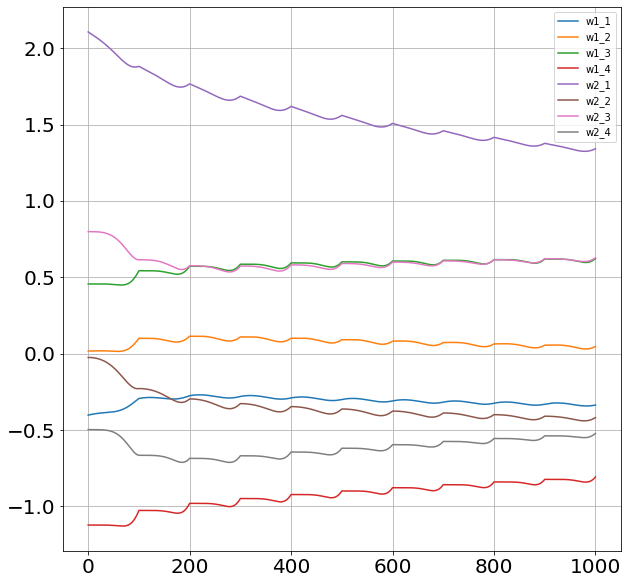

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(w1_trace, label = ['w1_1', 'w1_2', 'w1_3', 'w1_4'])
ax.plot(w2_trace, label = ['w2_1', 'w2_2', 'w2_3', 'w2_4'])
ax.tick_params(labelsize=20)
ax.legend(fontsize=10)
ax.grid()

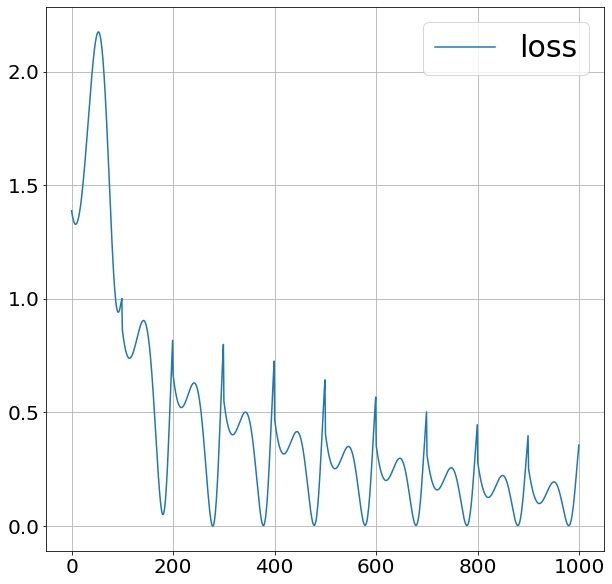

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

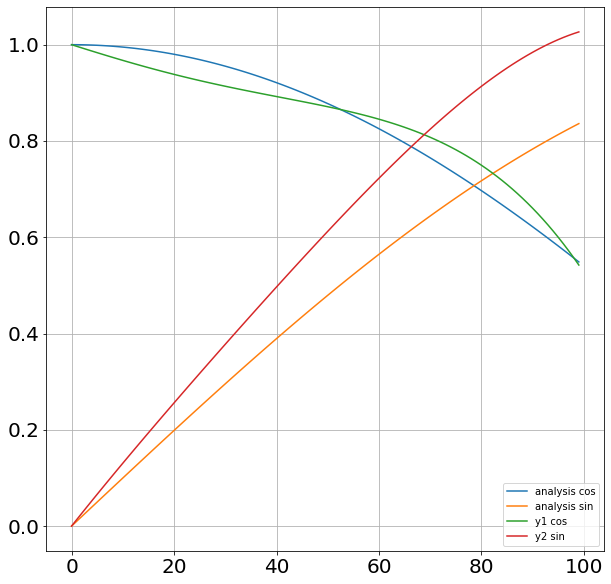

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(anal_cos(x), label = 'analysis cos')
ax.plot(anal_sin(x), label = 'analysis sin')
ax.plot(y(x, w1, n, 1), label = 'y1 cos')
# ax.plot(y(x, w1, n) - anal_cos(x), label = 'error cos')
ax.plot(y(x, w2, n, 0), label = 'y2 sin')
# ax.plot(y(x, w2, n) - anal_sin(x), label = 'error sin')
ax.tick_params(labelsize=20)
ax.legend(fontsize=10)
ax.grid()

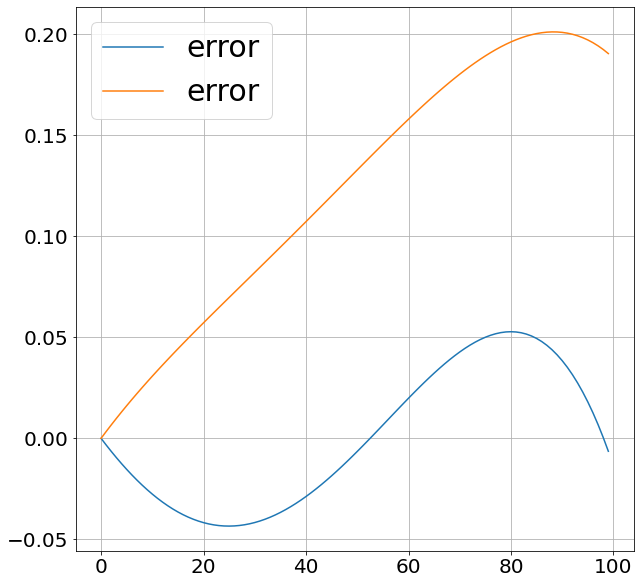

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y(x, w1, n, 1) - anal_cos(x), label = 'error')
ax.plot(y(x, w2, n, 0) - anal_sin(x), label = 'error')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()